<a href="https://colab.research.google.com/github/letessarini/search_code/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre processing

Audio data pre-processing algorithm for deep learning.

This file has the waveform and the "wav" file extraction.

The Fourier transform, as a graph as a function of frequency, and the MFCC spectrogram will be used as an input to the network.

# 1. Import the libraries


*   The librosa library is for audio analysis
*   The *librosa.display* extension is for visualizing the data as spectrograms which is built on top of the *matplotlib* library
*   Numpy for FFT application















In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 2. Get an audio file and upload



*   *file* is the audio folder path
*   To load the audio, we get a signal and a sampling rate and the signal will be a numpy matrix and a dimensional matrix
*   sr*T -> 44100 *3





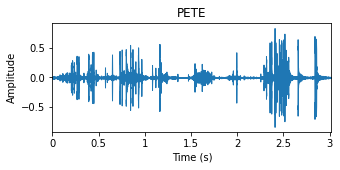

In [ ]:
file= "/content/drive/MyDrive/audios/banco_de_dados/PET/pet_1.wav"
signal, sr = librosa.load(file, sr=44100)
plt.subplots(figsize=(5, 2))
#View the waveform
librosa.display.waveplot(signal, sr=sr)
plt.title("PETE")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# 3. FFT



*   fft -> numpy array unidimencional




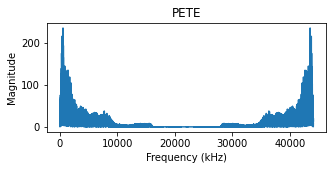

In [ ]:
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
#(sequence interval = 0Hz, sample rate (sr), number of evenly spaced values = the magnitude length)
plt.subplots(figsize=(5, 2))

plt.plot(frequency, magnitude)
plt.title("PETE")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.show()

Most of the energy is concentrated in the lower frequencies. And the higher the frequency and the less power, the less contribution it has to the signal.

The graph is symmetrical, a property of the Fourier Transform, given by Nyquist's theorem.

It only needs the first half as the other half is repeating information.


*n_fft*: considerando realizar uma única STFT.

*hop_lenght*: valores que está deslocando em cada transformada de Fourier para a direita, porque quando faz a transformada de Fourier de tempo curto desliza em intervalos e a cada intervalo calcula uma FFT e o salto do comprimento diz o quanto está deslizando para a direita.

*specshow*: função que permite visualizar dados semelhantes a espectrogramas, como mapa de calor, eixo x, eixo e y e a cor um terceiro eixo.

Pode-se perceber com o primeiro espectrograma que as frequencias tem amplitudes baixas, faznedo com que contribuem pouco para o som em geral. E em baixo pode obserar certas explosões semelhantes de energia nas frequencias mais baixas, que é o esperado em um espectro.

Há uma maneira de suavizar essa amplitude e visualizar de forma mais agradável, que é um logaritmico, chamado de log espectrograma.

*amplitude_to_db*: está pegando a amplitude do espectro original e convertendo para dB.



# 5. MFCC

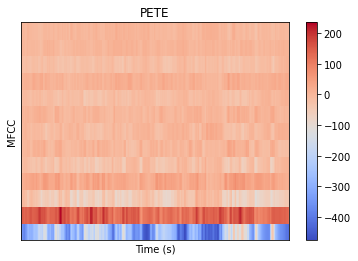

In [ ]:
#Extract MFCC features
MFCCs = librosa.feature.mfcc(signal, n_fft=2048, hop_length=512, n_mfcc=13)

#Plot the MFCC spectrogram
librosa.display.specshow(MFCCs, sr=sr, hop_length=512)
plt.title("PETE")
plt.xlabel("Time (s)")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

n_fft: considering performing a single STFT.

hop_length: values it is shifting in each Fourier transform to the right because when it does the short time, Fourier transforms it slides in intervals, and at each interval, it calculates an FFT, and the length jump tells how much it is sliding to the right.

n_mfcc: number of mfcc - number of coefficients to extract.
13 is a fair number and is commonly used in the technique

To perform the MFCC, you need to calculate the Short Time Fourier Transform (STFT).

On the y-axis, you can see the intervals; on the x-axis, you have the time to see how the different MFCCs evolve and it's stable.